In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import json

import util.collection_util as cu

In [2]:
def display_segment(segment_path):
    print(f'Segment path: {segment_path}')
    segment = cu.load(segment_path)
    
    print(f'keys: {segment.keys()}')
    print(f'total duration: {segment["total_duration"]}')
    print(f'start: {segment["start_sec"]}')
    print(f'end: {segment["end_sec"]}')
    print(f'label: {segment["label"]}')
    
    video = segment['video']
    audio = segment['audio']

    print(f'video data: {video.shape} {video.dtype}')
    
    rowscols = math.ceil(math.sqrt(video.shape[0]))
    fig, axes = plt.subplots(rowscols, rowscols, figsize=(16, 16))
    axes = axes.flatten()

    for ax, image in zip(axes, video):
        ax.imshow(image.astype(np.float32))
    
    print(f'audio data: {audio.shape} {audio.dtype}')
    
    if metadata['config'].get('apply_mfcc', False):
        import librosa.display
        fig, ax = plt.subplots(1, 1, figsize=(16, 6))
        librosa.display.specshow(audio, sr=metadata['config']['audio_sample_rate'], x_axis='time', ax=ax)
    else:
        fig, axes = plt.subplots(2, 1, figsize=(16, 10))
        for ax, channel in zip(axes, audio.T):
            ax.plot(channel)
    
    print()

## Dataset Path

In [3]:
dataset_dir = r'E:\Work\YasuoNet\data\dataset120_sl5_vsr3_vw64_vh64_asr22050_mfcc'

In [4]:
with open(os.path.join(dataset_dir, 'metadata.json')) as f:
    metadata = json.load(f)
metadata

{'created': '2020-08-13 01:39:46.287471',
 'config': {'segment_length': 5.0,
  'video_sample_rate': 3.0,
  'video_width': 64,
  'video_height': 64,
  'audio_sample_rate': 22050,
  'apply_mfcc': True},
 'data_shape': {'video': [15, 64, 64, 3], 'audio': [40, 216]},
 'total_segment_count': 90442,
 'segment_counts': {'20200205_KT_GEN_1': 938,
  '20200205_T1_DWG_1': 1079,
  '20200205_T1_DWG_2': 827,
  '20200206_GRF_AF_1': 1051,
  '20200206_GRF_AF_2': 743,
  '20200207_DRX_KT_2': 657,
  '20200207_DRX_KT_3': 780,
  '20200207_HLE_T1_1': 880,
  '20200207_HLE_T1_3': 825,
  '20200208_APK_DWG_1': 826,
  '20200208_APK_DWG_2': 614,
  '20200208_GEN_GRF_1': 689,
  '20200209_AF_HLE_3': 755,
  '20200209_SB_DRX_3': 855,
  '20200212_APK_AF_1': 1041,
  '20200212_APK_AF_2': 726,
  '20200212_APK_AF_3': 674,
  '20200212_GRF_SB_2': 762,
  '20200213_KT_T1_2': 633,
  '20200214_GRF_APK_3': 868,
  '20200215_AF_DRX_1': 826,
  '20200215_AF_DRX_2': 693,
  '20200215_HLE_SB_2': 790,
  '20200216_DWG_KT_1': 761,
  '202002

## Target Segment Path

In [5]:
normal_segment_path = os.path.join(dataset_dir, r'20200212_GRF_SB_2\seg_00080_0.pkl')
highlight_segment_path = os.path.join(dataset_dir, r'20200212_GRF_SB_2\seg_00589_1.pkl')

Segment path: E:\Work\YasuoNet\data\dataset120_sl5_vsr3_vw64_vh64_asr22050_mfcc\20200212_GRF_SB_2\seg_00080_0.pkl
keys: dict_keys(['video', 'audio', 'label', 'start_sec', 'end_sec', 'total_duration'])
total duration: 3805.38
start: 400.0
end: 405.0
label: 0
video data: (15, 64, 64, 3) float16
audio data: (40, 216) float64



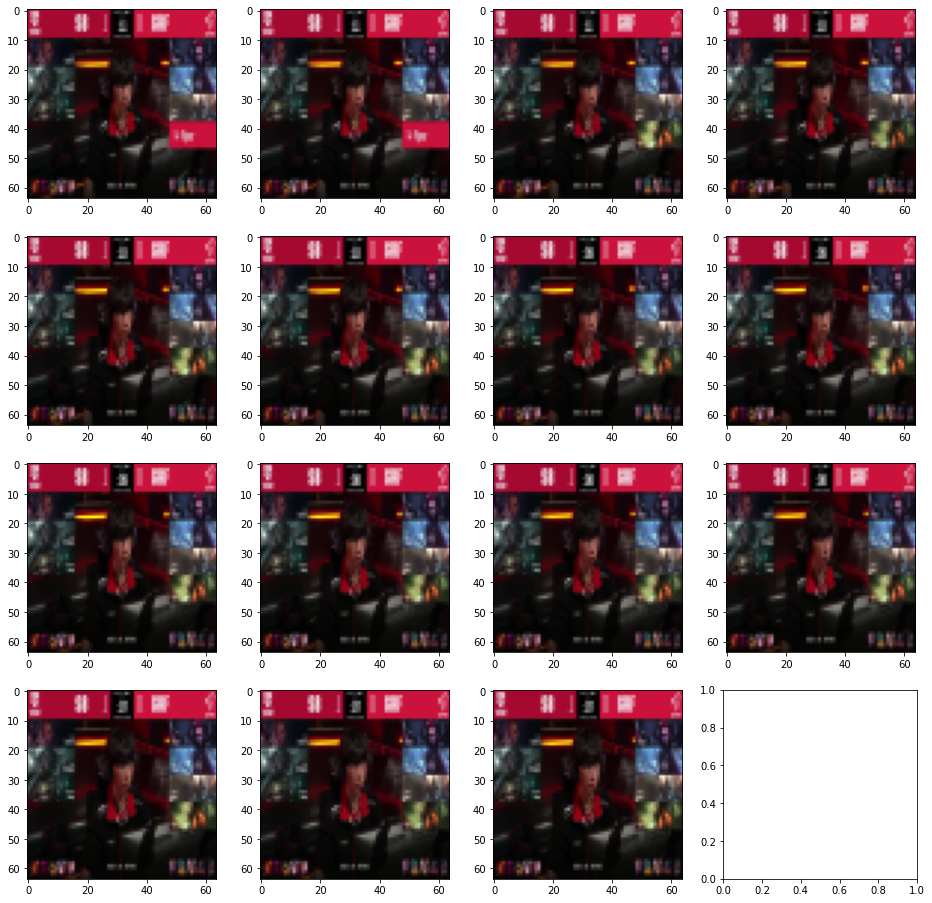

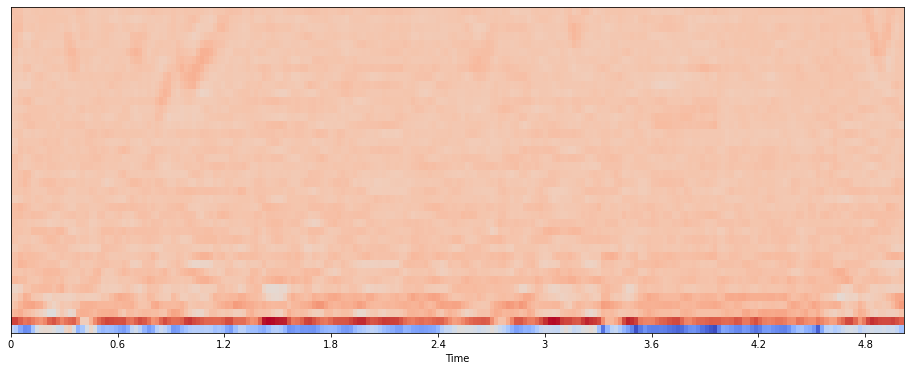

In [6]:
display_segment(normal_segment_path)

Segment path: E:\Work\YasuoNet\data\dataset120_sl5_vsr3_vw64_vh64_asr22050_mfcc\20200212_GRF_SB_2\seg_00589_1.pkl
keys: dict_keys(['video', 'audio', 'label', 'start_sec', 'end_sec', 'total_duration'])
total duration: 3805.38
start: 2945.0
end: 2950.0
label: 1
video data: (15, 64, 64, 3) float16
audio data: (40, 216) float64



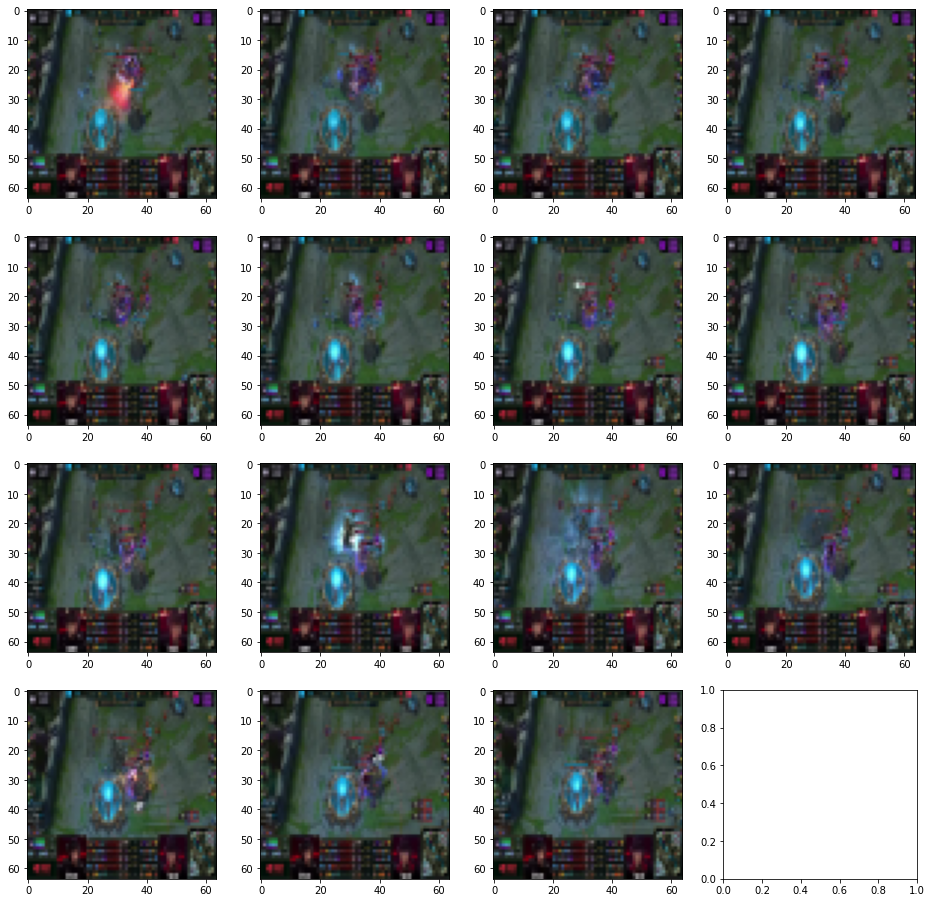

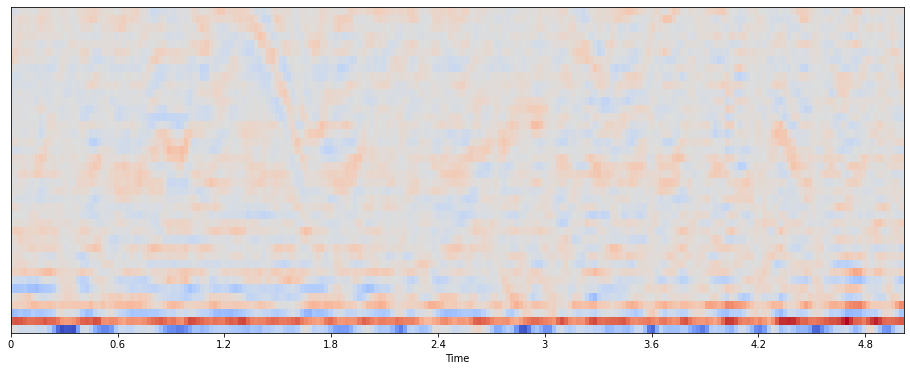

In [7]:
display_segment(highlight_segment_path)